### Nama : M. Tedi Bustami

### NIM : 0901128182372

### Kelas : SK5B

### Tugas UTS kecerdasan Buatan

Artificial Neural Network 4 Gender ID by Voice

Source : https://www.kaggle.com/vaakesan/artificial-neural-network-for-gender-recognition

Mengalisis ANN dengan tema Memprediksi Jenis Kelamin dengan suara dan Artificial Neural Network. Dari dataset ini menghasilkan output akhir berupa pengklasifikasian jenis kelamin memakai Jaringan syaraf tiruan pada suara yang di tangkap.

fungsi Kernel ini akan menggunakan jaringan saraf tiruan untuk mengklasifikasikan suara berdasarkan gender. Jaringan saraf akan memiliki dua lapisan tersembunyi, akan menggunakan fungsi aktivasi penyearah untuk setiap node di lapisan tersembunyi, dan menggunakan fungsi aktivasi logistik untuk menerima probabilitas setiap kelas di lapisan keluaran dan akan menggunakan penurunan gradien stokastik untuk meminimalkan fungsi tujuan (entropi silang). 

dengan memulai dengan membaca dataset dan melakukan beberapa eksplorasi data dasar. Cara kerja Neural Network dapat dianalogikan sebagaimana halnya manusia belajar dengan mengunakan contoh atau yang disebut sebagai supervised learning. Sebuah Neural Network dikonfigurasi untuk aplikasi tertentu, seperti pengenalan pola atau klasifikasi data, dan kemudian disempurnakan melalui proses pembelajaran

### Data Explore dan Import Persiapan

In [7]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

ModuleNotFoundError: No module named 'numpy'

File data input tersedia di direktori "../input/". Misalnya, menjalankan ini (dengan mengklik jalankan atau menekan Shift + Enter) akan mencantumkan file di direktori input

In [2]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

FileNotFoundError: [WinError 2] The system cannot find the file specified

Kernel ini akan menggunakan jaringan saraf tiruan untuk mengklasifikasikan suara berdasarkan gender. Jaringan saraf akan memiliki dua lapisan tersembunyi, akan menggunakan fungsi aktivasi penyearah untuk setiap node di lapisan tersembunyi, dan menggunakan fungsi aktivasi logistik untuk menerima probabilitas setiap kelas di lapisan keluaran dan akan menggunakan penurunan gradien stokastik untuk meminimalkan fungsi tujuan (entropi silang). Kami mulai dengan membaca dataset dan melakukan beberapa eksplorasi data dasar.

### Import Datasheet

In [3]:
dataset = pd.read_csv('../input/voice.csv')
dataset.head()

NameError: name 'pd' is not defined

In [4]:
dataset.describe()

NameError: name 'dataset' is not defined

In [5]:
dataset.corr()

NameError: name 'dataset' is not defined

All are numeric columns, and the final column gives us the labels (male or female) so lets lazily determine which column that is and use that to split our dataset into the independent and dependent variables:

In [6]:
num_columns = dataset.shape[1]
x = dataset.iloc[:,:20].values
y = dataset.iloc[:,20].values

NameError: name 'dataset' is not defined

The one non numeric category (labels) needs to be encoded using dummy variables,when we assign integer values to gender (binary variable in this case), it becomes a dummy variable.

In [7]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
gender_labels = LabelEncoder()
y = gender_labels.fit_transform(y)
# lets see which is 0 and which is 1
print(list(gender_labels.inverse_transform([0,1])))

['female', 'male']


### Membuat set data pengujian dan pelatihan

Generate testing and training datasets

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

These variables are between 0 and 1, but we normalize them so that they have comparable weightings.

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Creating an artificial neural network using keras, by building the layers two hidden layers and an output layer, then train the neural network on the training set.

### Back Propagation 

Backpropagation ini merupakan perkembangan dari single layer network (Jaringan Layar Tunggal) yang memiliki dua layer, yaitu input layer dan output layer. Adapun Back propagation memiliki tiga algoritma utama berupa Pengambilan input, Penelusuran error, Penyesuaian bobot. Backpropagation juga merupakan sebuah metode sistematik untuk pelatihan multilayer JST. Backpopagation dikatakan sebagai algoritma pelatihan multilayer karena Backpropagation memiliki tiga layer dalam proses pelatihannya, yaitu input layer, hidden layer dan output layer.

In [ ]:
def feedforward_back_prop(weights, bias, features, labels):
    '''
    features:  (20, 2534)
    weights: (20, 1)
    weights.T: (1, 20)
    bias: (20, 1)
    yHat: (1, 2534)
    '''
    # Feed Forward Propagation
    Z = np.dot(weights.T, features ) + bias
    yHat = sigmoid(Z)
    # Cost Function
    loss = -labels*np.log(yHat)-(1-labels)*np.log(1-yHat)
    cost = (np.sum(loss))/features.shape[1]
    # Backward Propagation
    dW = (np.dot(features, ((yHat-labels).T)))/features.shape[1]
    dB = np.sum(yHat-labels)/features.shape[1]
    grads = {"dW": dW, "dB": dB}
    return cost, grads

cost, grads = feedforward_back_prop(weights, bias, features, labels)

In [ ]:
def update(weights, bias, features, labels, lr, reiter):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating (learning) parameters is number_of_iterations times
    for i in range(reiter):
        
        cost, grads = feedforward_back_prop(weights, bias, features, labels)
        #cost = cost_function(features, labels, weights, bias)
        cost_list.append(cost)
        #Let's update
        weights = weights - lr * grads["dW"]
        bias = bias - lr * grads["dB"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iterations %i: %f" %(i, cost))
            
    # We update (learn) parameters weights and bias
    parameters = {"weights": weights, "bias": bias}
    plt.plot(index, cost_list2)
    plt.xticks(index, rotation = "vertical")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")
    plt.show()
    return parameters, grads, cost_list

In [10]:
import keras
from keras.models import Sequential
from keras.layers import Dense

classifier = Sequential()
classifier.add(Dense(units = 11, activation = 'relu', kernel_initializer = 'uniform', input_shape = (20,)))
classifier.add(Dense(units = 11, activation = 'relu', kernel_initializer = 'uniform'))
classifier.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'uniform', input_shape = (20,)))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)

Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Epoch 1/100
2534/2534 [==============================] - 1s 200us/step - loss: 0.5141 - acc: 0.8406
Epoch 2/100
2534/2534 [==============================] - 0s 154us/step - loss: 0.1335 - acc: 0.9641
Epoch 3/100
2534/2534 [==============================] - 0s 166us/step - loss: 0.0907 - acc: 0.9740
Epoch 4/100
2534/2534 [==============================] - 0s 169us/step - loss: 0.0802 - acc: 0.9736
Epoch 5/100
2534/2534 [==============================] - 0s 165us/step - loss: 0.0762 - acc: 0.9779
Epoch 6/100
2534/2534 [==============================] - 0s 158us/step - loss: 0.0740 - acc: 0.9759
Epoch 7/100
2534/2534 [==============================] - 0s 163us/step - loss: 0.0718 - acc: 0.9759
Epoch 8/100
2534/2534 [==============================] - 0s 163us/step - loss: 0.0719 - acc: 0.9775
Epoch 9/100
2534/2534 [==============================] - 0s 159us/step - loss: 0.0692 - acc: 0.9779
Epoch 10/100
2534/2534 [==============================] - 0s 160us/step - loss: 0.0684 - acc: 0.9795

The neural network is now built and trained, the weights are set, now we can evaluate the generalization performance of the neural network on the testing dataset.  We then use the threshold of 0.50 to convert output probilities from the sigmoid activation function into binary predictions for gender.

In [11]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

Evaluate the performance of the neural network using a confusion matrix.

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[294   7]
 [  8 325]]


A more fashionable plot, recall that 0 is female and 1 is male.

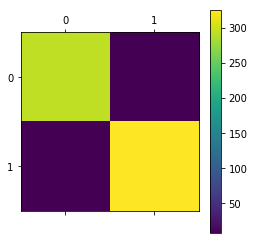

In [13]:
import matplotlib.pyplot as plt
plt.matshow(cm)
plt.colorbar()

### Hasil Kesimpulan 

Hasil pada dataset dengan pengujian yang rumit ini. Matriks konfusi menunjukkan bahwa neural net memprediksi jenis kelamin pada dataset pengujian dengan akurasi 98,3%.